# Image Classification using Support Vector Machines

Name MONIN Donélia

                      


## Introduction: 

Generally, Support Vector Machines is considered to be a classification approach, it but can be employed in both types of classification and regression problems. It can easily handle multiple continuous and categorical variables. SVM constructs a hyperplane in multidimensional space to separate different classes. SVM generates optimal hyperplane in an iterative manner, which is used to minimize an error. The core idea of SVM is to find a maximum marginal hyperplane(MMH) that best divides the dataset into classes.
For that, SVM learns similarities. SVM will search for class 1 samples that are very similar to class 2 samples. This will be the support vectors. Based on these support vectors, the algorithm tries to find the best hyperplane that separates the classes. The best line is the line that is far away from both class 1 and 2 samples (has the largest margin). To have optimal solution, we have to maximize the margin.

Some definitions:

- Hyperplane: 

In the SVM context, a hyperplan is a decision boundary which separates between a set of objects having different class memberships.

- Margin:

The margin is orthogonal to the boundary and equidistant to the support vectors. If the margin is larger in between the classes, then it is considered a good margin, a smaller margin is a bad margin.


## Objectif: 

In this work, you will learn about SVM or Support Vector Machine, which is one of the most popular Machine Learning algorithms and about the Kernel Trick, which deals with non-linearity and higher dimensions. 
The goal is to classify pixels in the sea image named 'classif1.gif'. We want to learn a binary SVM classifier capable of distinguishing between grass and sea pixels.

In [ ]:
# Useful functions and imports

import matplotlib.pyplot as plt
import numpy as np
from skimage.measure import regionprops, label

import os
import os.path
import sys
from skimage import io, img_as_uint
from skimage.io import imsave
from sklearn import svm, datasets

import matplotlib.patches as patches

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


From a computer point of view, an image is a matrix where each box represents
a pixel. These boxes contain either a single value if it is an image.

  - Import and display images with pyplot. 

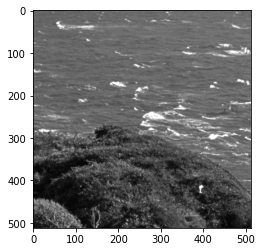

In [ ]:
## Images

Path = '/content/gdrive/My Drive/Images/'#'Enter the path to the image'

## Reading images

##### Original Image
Original_Image = io.imread(Path + 'classif1.gif')

##### Texture Image
Texture_Image = io.imread(Path + 'classif1Text.gif')
                                       
##### Zebra Image
Zebra_Image = io.imread(Path + 'zebre.gif')

#Plot image
plt.figure()
plt.imshow(Original_Image, cmap='gray')
plt.show()


## Generate learning sets

One pixel correspond to one kind of feature.

1) Determine rectangles corresponding to the pixels that will be used as a representative of their classes.
For each rectangle, specify its length and width as well as the coordinates of the upper left corner.

2) Visualize and explain the choices of learning sets. Why did you choose these?


In [ ]:
def Classe_visualization(Image, Classes):

    '''Define square centered in (x,y) and L long.'''
       
    colors = ['b', 'r', 'w']
    # Create figure and axes
    fig,ax = plt.subplots(1)

    # Display the image
    ax.imshow(Image, cmap='gray')

    for classe_label in range(len(Classes)):
        
        color = colors[classe_label]
        top_left_corner, length_Width = Classes[classe_label]
        
        for rectangle_label in range(len(top_left_corner)):
            x, y = top_left_corner[rectangle_label]
            L, l = length_Width[rectangle_label]

            # Create a Rectangle patch
            rect = patches.Rectangle((x,y),L,l,linewidth=1,edgecolor=color,facecolor='none')

            # Add the patch to the Axes
            ax.add_patch(rect)

    plt.show()


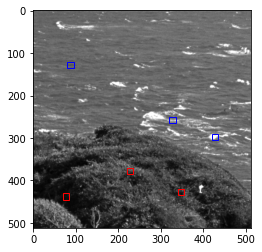

In [ ]:
# Define for each class, squares centered in (x,y) and L long.

##### Classe 1
top_left_corner_1 = [[80,120], [420,290], [320,250]] #, [300,100]]
length_Width_1 = [[15,15],[15,15],[15,15]]#,[10,10],[10,10], [10, 10]]
Classe_1 = [top_left_corner_1, length_Width_1]

##### Classe 2
top_left_corner_2 = [[220,370],  [70,430], [340,420]]
length_Width_2 = [[15,15],[15,15], [15, 15]]#,[10,10],[10,10], [10,10]]
Classe_2 = [top_left_corner_2, length_Width_2]

Classe_visualization(Original_Image, [Classe_1, Classe_2])


In [ ]:
def Recover_Pixels_Values(Original_Image, Classe):
    
    '''Retrieve the pixel values in the different chosen rectangle.'''
    
    Pixels_values = []
        
    top_left_corner, length_Width = Classe[0], Classe[1]
    
    for rectangle_label in range(len(top_left_corner)):
        
        x, y = top_left_corner[rectangle_label]
        L, l = length_Width[rectangle_label]
                
        CroppedImage_Rectangle = Original_Image.copy()
        CroppedImage_Rectangle = CroppedImage_Rectangle[x:x+L, y-l: y]
        
        for elem in CroppedImage_Rectangle:
            
            Pixels_values += elem.tolist()
            
    return Pixels_values

def Generate_X_2D_Intensities(X_1D):
    
    X = []
    for x in X_1D:
        X.append([x,x])
    X = np.array(X)
    return X

In [ ]:
#Retrieve for each class the pixel values in the different chosen rectangle

Pixels_intensities_Classe_1 = Recover_Pixels_Values(Original_Image, Classe_1)
Pixels_intensities_Classe_2 = Recover_Pixels_Values(Original_Image, Classe_2)


3) Plot the histograms of the two vectors (classes 1 and 2) and comment.

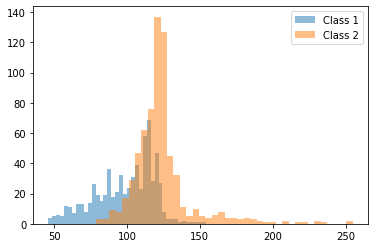

In [ ]:

x1 = np.arange(len(Pixels_intensities_Classe_1))
x2 = np.arange(len(Pixels_intensities_Classe_2))

bins = 40

plt.figure()
plt.hist(Pixels_intensities_Classe_1, bins, alpha=0.5, label='Class 1')
plt.hist(Pixels_intensities_Classe_2, bins, alpha=0.5, label='Class 2')
plt.legend(loc='upper right')
plt.show()

#Concatenate the two vectors (class 1 and 2) to get the learning set and their labels

X_1D_intensities = np.array(Pixels_intensities_Classe_1 + Pixels_intensities_Classe_2)
y = np.array([1]*len(Pixels_intensities_Classe_1) + [2]*len(Pixels_intensities_Classe_2))

In [ ]:
# 2D Array generation: Take intensity values as x and y

X = Generate_X_2D_Intensities(X_1D_intensities)

print('X.shape', X.shape)
print('y.shape', y.shape)

X.shape (1350, 2)
y.shape (1350,)


4) Why is this step necessary?

## Classifier learning part

To train the kernel SVM, we use the same SVC class of the Scikit-Learn's svm library. We will implement linear, Gaussian and polynomial kernels to see which one works better for our problem.

5) Observe the impact of the parameters C, Gamma and the kerneloption.
Explain your strategy of the choice of parameters to obtain the most optimal result = sea/grass segmentation.

In [ ]:
def SVM_Application(KernelType, X, y):
    
    ''' We create an instance of SVM and fit out data. We do not scale our
    data since we want to plot the support vectors '''
    
    degree = 0
    if KernelType == 'Linear':
        C = 1000 # SVM regularization parameter
        gamma = 10 # Kernel coefficient
        K = 'linear' #Kernel
    elif KernelType == 'Gaussian':
        C = 100 # SVM regularization parameter
        gamma = 0.00001 # Kernel coefficient
        K = 'rbf'
    elif KernelType == 'Polynomial':
        C = 10 # SVM regularization parameter
        gamma = 1 # Kernel coefficient
        degree = 2 # Degree of the polynomial kernel function
        K = 'poly'
    else:
        print("Specifies the kernel type to be used in the algorithm. It must be one of Linear, Gaussian or Poly")

    print('K', K)
    print('C', C)
    print('gamma', gamma)
    classifier = svm.SVC(kernel=K, C=C, gamma=gamma, degree=degree)
    models = classifier.fit(X, y)
    return classifier
    

In [ ]:
def Plot_Data_SVMmargin(X, y, clf):
    
    ''' Plot learning data and margin '''
    
    plt.figure()
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    plt.show()

K linear
C 1000
gamma 10


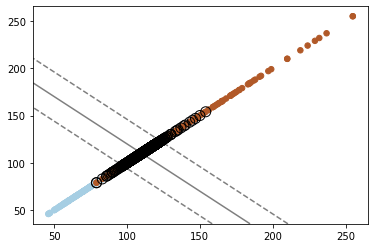

In [ ]:
# Classifier learning

KernelType = 'Linear'
#clf_3 = SVM_Application(KernelType, X, y)

# Plot the classifier learned and the 
#Plot_Data_SVMmargin(X, y, clf_1)

KernelType = 'Gaussian'
#clf_1 = SVM_Application(KernelType, X, y)

# Plot the classifier learned and the 
#Plot_Data_SVMmargin(X, y, clf_1)


KernelType = 'Polynomial'
clf_2 = SVM_Application(KernelType, X, y)

# Plot the classifier learned and the 
Plot_Data_SVMmargin(X, y, clf_2)

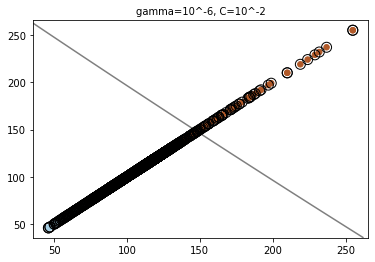

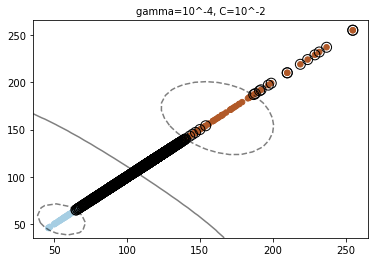

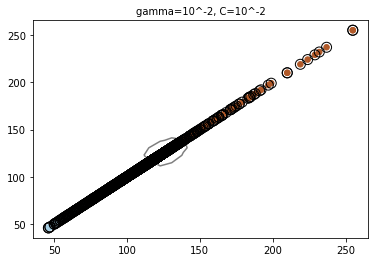

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: No contour levels were found within the data range.


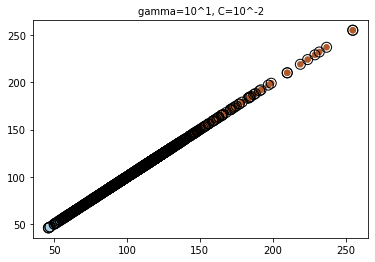

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: No contour levels were found within the data range.


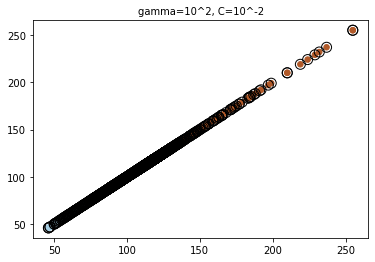

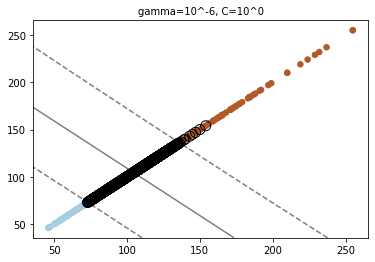

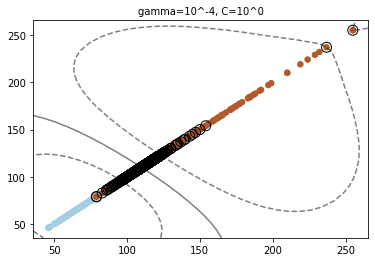

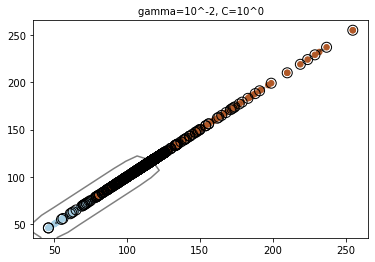

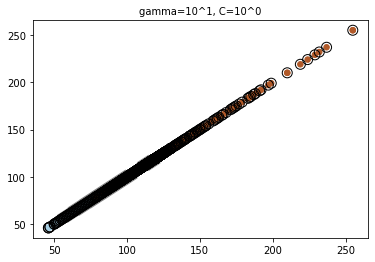

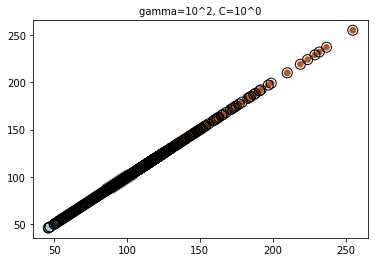

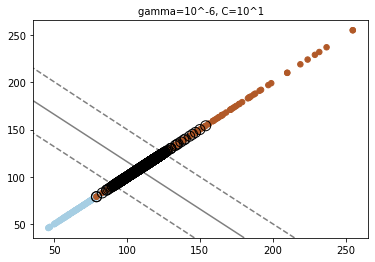

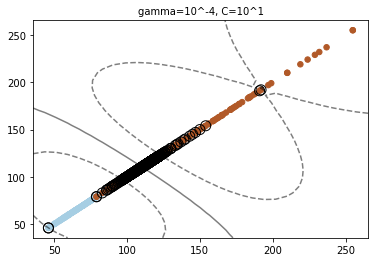

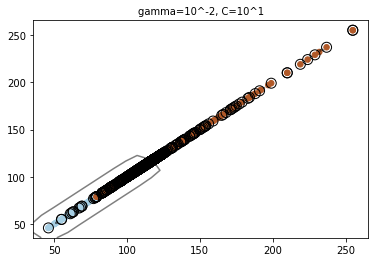

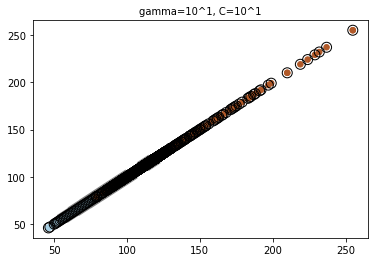

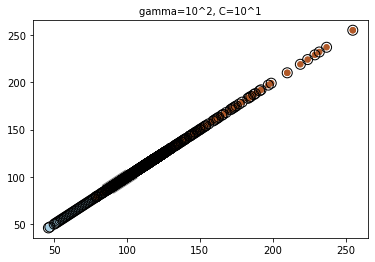

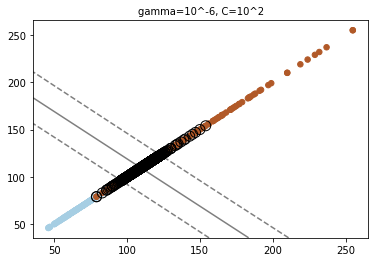

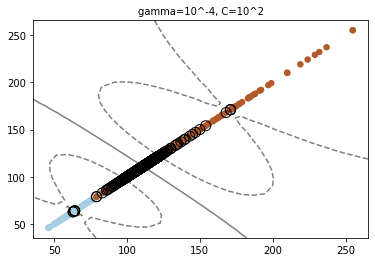

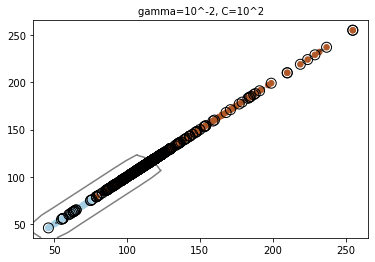

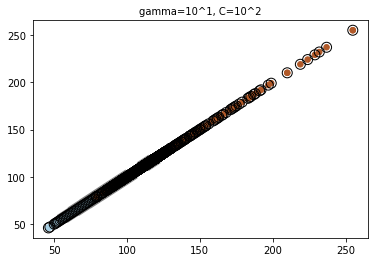

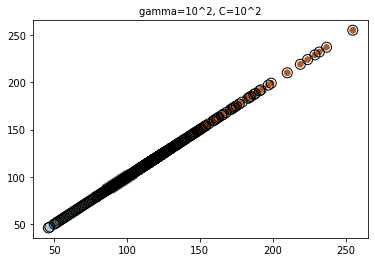

In [ ]:
 #GAUSSIAN PLOT
    
C_2d_range = [1e-2, 1, 1e1, 1e2]
gamma_2d_range = [1e-6, 1e-4, 1e-2, 10, 1e2]
classifiers = []
for C in C_2d_range:
    for gamma in gamma_2d_range:
        clf = SVC(C=C, gamma=gamma)
        clf.fit(X, y)
        classifiers.append((C, gamma, clf))
for (k, (C, gamma, clf)) in enumerate(classifiers):
 
  
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)
    plt.title("gamma=10^%d, C=10^%d" % (np.log10(gamma), np.log10(C)),size='medium')
    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    plt.show()

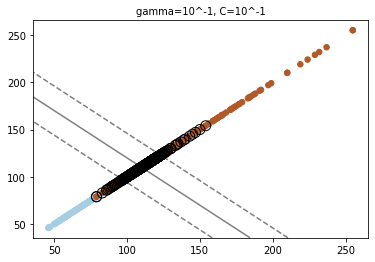

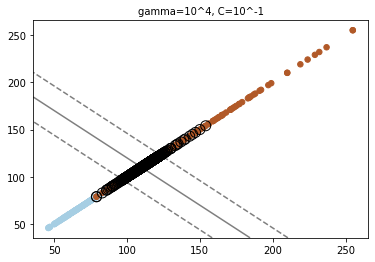

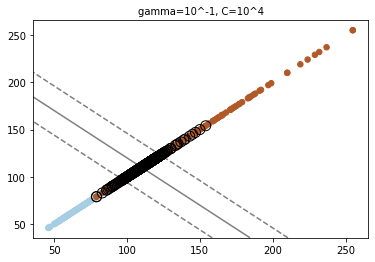

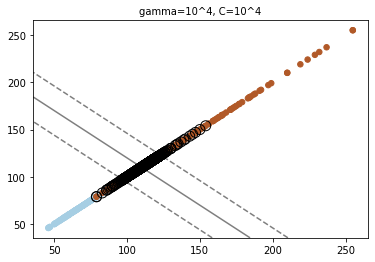

In [ ]:
#Linear 

C_2d_range2 = [1e-1, 1e4]
gamma_2d_range2 = [1e-1, 1e4]
classifiers2 = []
for C in C_2d_range2:
    for gamma in gamma_2d_range2:
        clf = SVC(kernel="linear", C=C, gamma=gamma)
        clf.fit(X, y)
        classifiers2.append((C, gamma, clf))

for (k, (C, gamma, clf)) in enumerate(classifiers2):
 
  
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)
    plt.title("gamma=10^%d, C=10^%d" % (np.log10(gamma), np.log10(C)),size='medium')
    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    plt.show()

## Prediction part

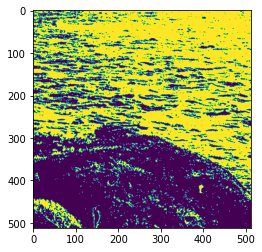

In [ ]:
def Recover_MaskOfPixelsPredictions(Original_Image, clf):

    BinaryMask = Original_Image.copy()
    for xp in range(Original_Image.shape[0]):
        for yp in range(Original_Image.shape[1]):
            pixelValue = Original_Image[xp,yp]
            pred = clf.predict(np.array([pixelValue, pixelValue]).reshape(1, -1))
            BinaryMask[xp,yp] = np.int(pred)
            
    return BinaryMask

BinaryMask_intensities = Recover_MaskOfPixelsPredictions(Original_Image, clf_3)

plt.figure()
plt.imshow(BinaryMask_intensities)
plt.show()

6- Comment on the result.

# Adding information about the texture of the image
Texture => gives us information about the spatial arrangement of color or intensities in an image or selected region of an image

## Combine the features of intensity and texture

7) Again, play with the different parameters. Repeat questions 3, 5 and 6.

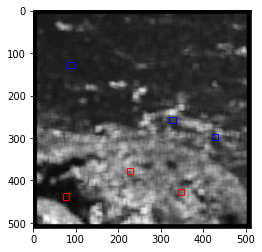

X.shape (1350, 2)
y.shape (1350,)
K rbf
C 100
gamma 1e-05


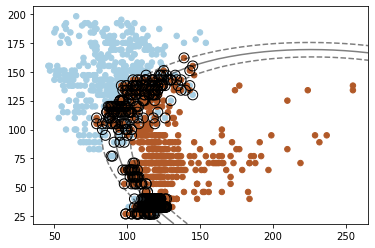

In [ ]:
#Plot image

Classe_visualization(Texture_Image, [Classe_1, Classe_2])

Pixels_textures_Classe_1 = Recover_Pixels_Values(Texture_Image, Classe_1)
Pixels_textures_Classe_2 = Recover_Pixels_Values(Texture_Image, Classe_2)

X_1D_textures = np.array(Pixels_textures_Classe_1 + Pixels_textures_Classe_2)

def Generate_X_2D_IntensitiesTextures(X_1D_intensities, X_1D_textures):
    
    if len(X_1D_intensities) == len(X_1D_textures):
        X = []
        for x in range(len(X_1D_intensities)):
            X.append([X_1D_intensities[x], X_1D_textures[x]])
        X = np.array(X)
    else:
        print('Probleme of size: check your vectors, it must be the same size.')
    return X

# Intensity_Intensity 2D Data generation

X = Generate_X_2D_IntensitiesTextures(X_1D_intensities, X_1D_textures)

print('X.shape', X.shape)
print('y.shape', y.shape)

KernelType = 'Gaussian'
clf_2 = SVM_Application(KernelType, X, y)

Plot_Data_SVMmargin(X, y, clf_2)

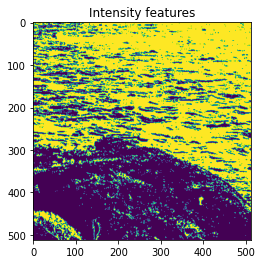

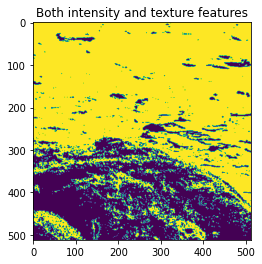

In [ ]:
BinaryMask_IntensitiesAndTextures = Recover_MaskOfPixelsPredictions(Original_Image, clf_2)

plt.figure()
plt.imshow(BinaryMask_intensities)
plt.title('Intensity features')
plt.figure()
plt.imshow(BinaryMask_IntensitiesAndTextures)
plt.title('Both intensity and texture features')
plt.show()

## Application on Zebra image

Finally, use the same process to classify the image "zebre.gif".

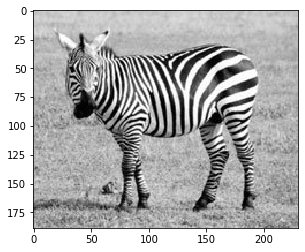

In [ ]:
#Plot image
plt.figure()
plt.imshow(Zebra_Image, cmap='gray')
plt.show()

8) Propose a strategy of the choice of parameters to obtain the most optimal result => Zebra segmentation.

1- Choose the pixel of the learning set.

2- SVM parameters (Kernel, ..)

3- Maybe other features ?

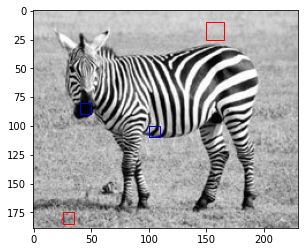

In [ ]:
# Define for each class, squares centered in (x,y) and L long.

##### Classe 1
top_left_corner_1 = [[100,100], [40,80]] #, [300,100]]
length_Width_1 = [[10,10],[10,10],[15,15]]#,[10,10],[10,10], [10, 10]]
Classe_1 = [top_left_corner_1, length_Width_1]

##### Classe 2
top_left_corner_2 = [[25,175],  [150,10], [340,420]]
length_Width_2 = [[10,10],[15,15], [15, 15]]#,[10,10],[10,10], [10,10]]
Classe_2 = [top_left_corner_2, length_Width_2]

Classe_visualization(Zebra_Image, [Classe_1, Classe_2])

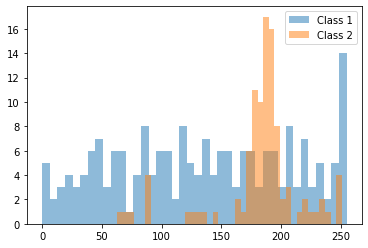

X.shape (300, 2)
y.shape (300,)


In [ ]:
#Retrieve for each class the pixel values in the different chosen rectangle

Pixels_intensities_Classe_1 = Recover_Pixels_Values(Zebra_Image, Classe_1)
Pixels_intensities_Classe_2 = Recover_Pixels_Values(Zebra_Image, Classe_2)


x1 = np.arange(len(Pixels_intensities_Classe_1))
x2 = np.arange(len(Pixels_intensities_Classe_2))

bins = 40

plt.figure()
plt.hist(Pixels_intensities_Classe_1, bins, alpha=0.5, label='Class 1')
plt.hist(Pixels_intensities_Classe_2, bins, alpha=0.5, label='Class 2')
plt.legend(loc='upper right')
plt.show()

#Concatenate the two vectors (class 1 and 2) to get the learning set and their labels

X_1D_intensities = np.array(Pixels_intensities_Classe_1 + Pixels_intensities_Classe_2)
y = np.array([1]*len(Pixels_intensities_Classe_1) + [2]*len(Pixels_intensities_Classe_2))

# 2D Array generation: Take intensity values as x and y

X = Generate_X_2D_Intensities(X_1D_intensities)

print('X.shape', X.shape)
print('y.shape', y.shape)

K rbf
C 100
gamma 1e-05


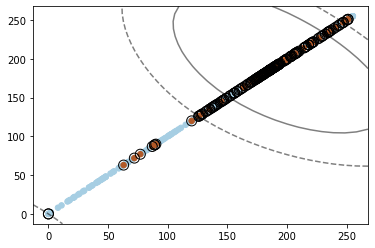

In [ ]:

KernelType = 'Gaussian'
clf_2 = SVM_Application(KernelType, X, y)

# Plot the classifier learned and the 
Plot_Data_SVMmargin(X, y, clf_2)

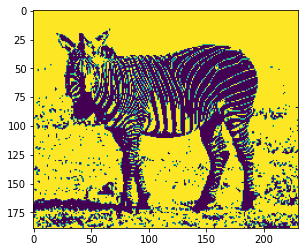

In [ ]:
def Recover_MaskOfPixelsPredictions(Original_Image, clf):

    BinaryMask = Original_Image.copy()
    for xp in range(Original_Image.shape[0]):
        for yp in range(Original_Image.shape[1]):
            pixelValue = Original_Image[xp,yp]
            pred = clf.predict(np.array([pixelValue, pixelValue]).reshape(1, -1))
            BinaryMask[xp,yp] = np.int(pred)
            
    return BinaryMask

BinaryMask_intensities = Recover_MaskOfPixelsPredictions(Zebra_Image, clf_2)

plt.figure()
plt.imshow(BinaryMask_intensities)
plt.show()